### Negin Baghbanzadeh

**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


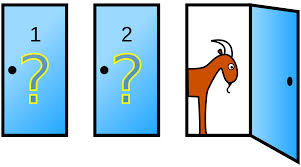

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [1]:
import random
import matplotlib.pyplot as plt
NUMBER_OF_GAMES = 1000
NUMBER_OF_DOORS = 3

In [2]:
def get_random(floor):
    return random.randint(0, floor-1)

In [3]:
def play_game(switch):
    doors = [0, 0, 0]
    cars_door = get_random(NUMBER_OF_DOORS)
    doors[cars_door] = 1
    players_choice = get_random(NUMBER_OF_DOORS)
    montys_hall = -1
    if players_choice == cars_door:
        montys_choice = get_random(NUMBER_OF_DOORS)
    else:
        montys_choice = NUMBER_OF_DOORS - players_choice - cars_door
    final_players_choice = -1
    if switch:
        final_players_choice = NUMBER_OF_DOORS - players_choice - montys_choice
    else:
        final_players_choice = players_choice
    if final_players_choice == cars_door:
        return True
    else:
        return False

In [4]:
switch_win_count = 0
keep_win_count = 0
change_index_list = []
change_win_percentage_list = []
keep_index_list = []
keep_win_percentage_list = []
for game in range(NUMBER_OF_GAMES):
    result = play_game(True)
    if result:
        switch_win_count += 1
    change_index_list.append(game)
    change_win_percentage_list.append(100*(switch_win_count/(game+1)))
print("Switching strategy: won ", 100*(switch_win_count/NUMBER_OF_GAMES), "% of thimes")

for game in range(NUMBER_OF_GAMES):
    result = play_game(False)
    if result:
        keep_win_count += 1
    keep_index_list.append(game)
    keep_win_percentage_list.append(100*(keep_win_count/(game+1)))
print("Keeping strategy: won ", 100*(keep_win_count/NUMBER_OF_GAMES), "% of thimes")

Switching strategy: won  72.2 % of thimes
Keeping strategy: won  35.4 % of thimes


Text(0.5, 1.0, 'Switching strategy')

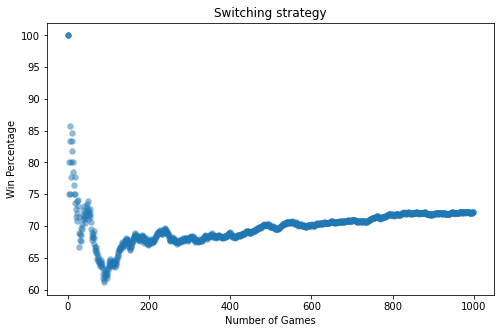

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(change_index_list,change_win_percentage_list,alpha=0.5,marker=None,linewidths=0.25)
plt.ylabel('Win Percentage')
plt.xlabel('Number of Games')
plt.title('Switching strategy')

Text(0.5, 1.0, 'Keeping strategy')

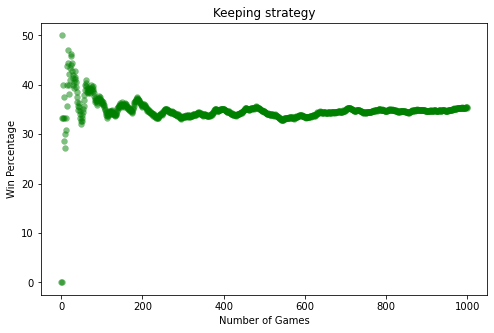

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(keep_index_list,keep_win_percentage_list,alpha=0.5,marker=None,linewidths=0.25, color='green')
plt.ylabel('Win Percentage')
plt.xlabel('Number of Games')
plt.title('Keeping strategy')

At First that player doesn't know anything about what's behind each door, the probability of car being behind each door is 1/3. After player chooses one of the doors, the probability of car being behind the remaining doors(two doors) is 2/3; But after Monty Hall omitting one of the two remaining doors, the peobability of the car being behind the remaining door will be 2/3 which is twice the probability of car being behind the first chosen door.<br/>
You can also see on the results that with switching strategy, the player won almost twice the times with keeping strategy.

So it is to advantage to change the door after Monty asks.